In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mothers_hmis_df = pd.read_csv('data/mothers_hmis.csv')
prompts_engagement_df = pd.read_csv('data/prompts_engagement.csv')

In [3]:
mothers_hmis_df.head()

,mother_id,facility_id,county,residence_type,age,age_group,parity,delivery_date,delivery_mode,complication_delivery,postpartum_complication_6w,postnatal_visit_date_1,postnatal_visit_6w,prompts_enrolled,prompts_mother_id
0,1,F028,Kilifi,rural,36,35-49,4,2024-10-17,CS,none,0,2024-11-18,1,0,NaN
1,2,F007,Kiambu,peri_urban,34,25-34,4,2024-07-23,SVD,other,0,2024-08-30,1,1,P00001
2,3,F002,Nairobi,urban,30,25-34,1,2024-03-21,SVD,sepsis,0,2024-04-25,1,0,NaN
3,4,F019,Kajiado,peri_urban,17,15-19,0,2024-03-23,SVD,none,0,NaN,0,1,P00002
4,5,F019,Kajiado,peri_urban,24,20-24,2,2024-11-06,SVD,none,0,2024-11-23,1,1,P00003


#### 1. KPIs

In [4]:
# i. Total number of mothers enrolled in PROMPTS

total_mothers_enrolled_ = mothers_hmis_df['prompts_enrolled'].sum()
print(f"Total number of mothers enrolled in PROMPTS: {total_mothers_enrolled_}")

Total number of mothers enrolled in PROMPTS: 2606


In [5]:
# ii. PROMPTS enrollment rate

total_pregnant_mothers = mothers_hmis_df["mother_id"].nunique()
total_prompts_enrolled_mothers = mothers_hmis_df["prompts_enrolled"].sum()

prompts_enrollment_rate = 100 * total_prompts_enrolled_mothers / total_pregnant_mothers

print(f"PROMPTS enrollment rate: {prompts_enrollment_rate:.2f}%")

PROMPTS enrollment rate: 52.12%


###### A PROMPTS enrollment rate of 52.12% shows that only about half of eligible mothers are enrolled, so there is substantial room to expand program coverage by targeting facilities, communities, or sub‑counties with low enrollment, strengthening provider practices for offering PROMPTS at ANC/PNC contacts, and monitoring this percentage regularly to see if outreach and process improvements are working.

In [6]:
# iii. Average number of messages sent during pregnancy

avg_msgs_sent_pregnancy = prompts_engagement_df['msgs_sent_pregnancy'].mean()
print(f"Average number of messages sent per pregnant mother during pregnancy: {avg_msgs_sent_pregnancy:.2f}")

Average number of messages sent per pregnant mother during pregnancy: 30.00


###### An average of 30 messages sent per pregnant mother during pregnancy shows that enrolled women are consistently receiving your health information “dose” over the course of pregnancy, which is important because sustained SMS exposure is often needed to influence knowledge and care‑seeking behaviors. The actionable use of this KPI is to verify that 30 messages matches your intended schedule by gestational age, check whether mothers who receive this full dose have better ANC attendance or outcomes than those with fewer messages, and adjust message timing or content, not simply volume, if you are not seeing the desired behavior change.

In [7]:
# iv. Average number of messages sent in the first 6 weeks postpartum

avg_msgs_sent_pregnancy = prompts_engagement_df['msgs_sent_postpartum_6w'].mean()
print(f"Average number of messages sent per mother in the first 6 weeks postpartum: {avg_msgs_sent_pregnancy:.2f}")

Average number of messages sent per mother in the first 6 weeks postpartum: 17.44


###### An average of 17.44 messages per mother in the first 6 weeks postpartum indicates that mothers are receiving a steady flow of support messages; the key actions are to confirm that this frequency matches established protocol, watch for signs of message fatigue or low engagement, and adjust the content or timing of messages, rather than simply increasing volume, if desired postpartum behaviors or outcomes are not improving.

In [8]:
# v. Average number of messages to mothers who attended PNC 6-week visit vs those who did not

# Merge HMIS and PROMPTS data on mother_id
merged_mothers_prompts_df = pd.merge(
    mothers_hmis_df,
    prompts_engagement_df,
    on="mother_id",
    how="inner"
)

# Keep only needed columns
select_merged_columns_df = merged_mothers_prompts_df[
    ["mother_id", "postnatal_visit_6w", "msgs_sent_postpartum_6w"]
]

# Compute average messages by 6-week PNC attendance status
average_num_of_messages = (
    select_merged_columns_df
    .groupby("postnatal_visit_6w")["msgs_sent_postpartum_6w"]
    .mean()
    )

print("Average number of messages sent in the first 6 weeks postpartum:")
print(average_num_of_messages)

Average number of messages sent in the first 6 weeks postpartum:
postnatal_visit_6w
0    17.535985
1    17.371613
Name: msgs_sent_postpartum_6w, dtype: float64


###### Average messages in the first 6 weeks postpartum are almost the same for mothers who attended the 6‑week PNC visit (17.37) and those who did not (17.54), so message dose is not meaningfully different between the two groups. The actionable insight is that simply sending more messages is unlikely to be what drives PNC attendance; instead, the organization should focus on improving message content and timing (for example, stronger appointment reminders, addressing barriers, tailoring to risk) and on non‑SMS factors at facility and community level, while you explore whether specific subgroups with lower attendance need more targeted communication.

In [9]:
# vi. Overall PNC 6‑week coverage
total_mothers = len(mothers_hmis_df)
total_mothers_with_pnc_6w = mothers_hmis_df["postnatal_visit_6w"].sum()

pnc_6_week_coverage = 100 * total_mothers_with_pnc_6w / total_mothers

print(f"The total coverage of PNC 6-week visits is {pnc_6_week_coverage:.2f}%")

The total coverage of PNC 6-week visits is 57.96%


###### An overall PNC 6‑week coverage of about 58% means roughly 4 in 10 mothers leave the facility and do not return for a postnatal check within 6 weeks. The actionable insight is that the health program should treat postnatal follow‑up as a major gap and priority area, and design targeted interventions. Examples of these interventions include stronger discharge counseling, automated PROMPTS reminders, and CHV follow‑up for high‑risk mothers. A concrete goal could be to raise PNC 6‑week coverage from 58% to a specific target, for example at least 70% over the next year.

#### 2. KPIs

  age_group  pnc_6w_coverage
0     15-19        50.332226
1     20-24        58.573487
2     25-34        59.156328
3     35-49        59.296482


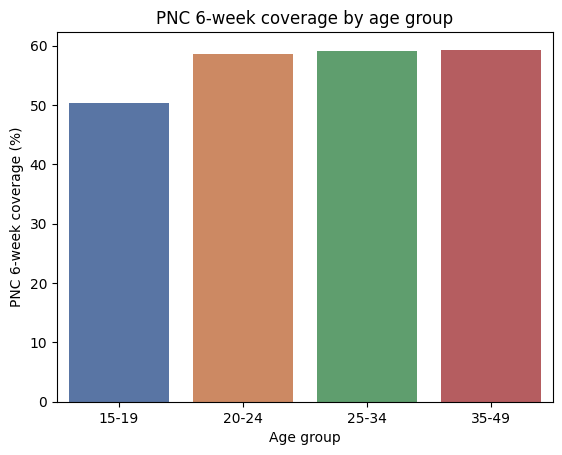

In [10]:
# i. PNC 6‑week coverage by age group

pnc_by_age = (
    mothers_hmis_df
    .groupby("age_group")["postnatal_visit_6w"]
    .mean() * 100
).reset_index(name="pnc_6w_coverage")

print(pnc_by_age)

# Plot
sns.barplot(data=pnc_by_age, x="age_group", y="pnc_6w_coverage", palette="deep", hue="age_group")
plt.xlabel("Age group")
plt.ylabel("PNC 6‑week coverage (%)")
plt.title("PNC 6‑week coverage by age group")
plt.show()

###### Teenage mothers (15–19) have noticeably lower PNC 6‑week coverage (about 50%) than older mothers (around 59%), which means they are a key high‑risk group that needs targeted support, so the program should design and test adolescent‑focused interventions, such as youth‑friendly discharge counseling, tailored PROMPTS messaging, and CHV follow‑up specifically for 15–19‑year‑olds, with the goal of closing this gap so their PNC 6‑week coverage matches or exceeds that of older age groups.

residence_type
peri_urban    1314
rural         1180
urban          404
Name: postnatal_visit_6w, dtype: int64


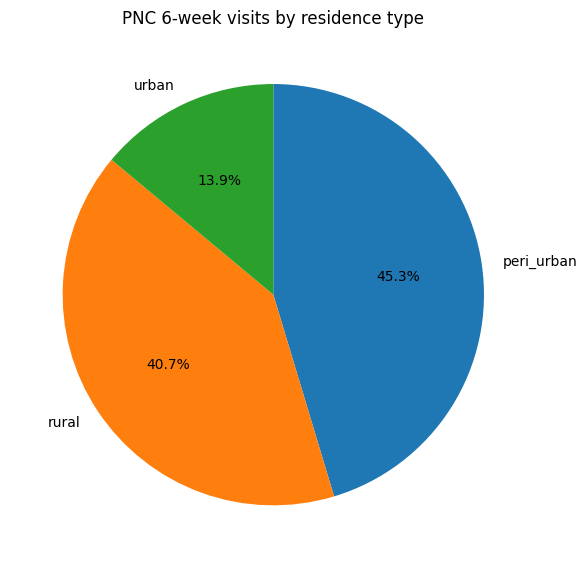

In [11]:
# ii. PNC 6-week coverage by residence type

pnc_by_residence = (
    mothers_hmis_df[mothers_hmis_df["postnatal_visit_6w"] == 1]
    .groupby("residence_type")["postnatal_visit_6w"]
    .count()
)
print(pnc_by_residence)

labels = pnc_by_residence.index
sizes = pnc_by_residence.values

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("PNC 6‑week visits by residence type")
plt.tight_layout()
plt.show()

###### Peri‑urban and rural mothers together account for almost 90% of all PNC 6‑week visits, while urban mothers make up only about 14%, which suggests that urban women are either under‑represented in the program or less likely to return for PNC; the program should therefore investigate barriers specific to urban facilities and informal settlements, strengthen PROMPTS enrollment and discharge counseling in urban sites, and set a target to increase the share and coverage of urban mothers receiving PNC within 6 weeks.

     county  pnc_6w_count
0   Kajiado           661
1    Kiambu           312
2    Kilifi           564
3     Kisii           261
4  Machakos           341
5   Makueni           355
6   Nairobi           404


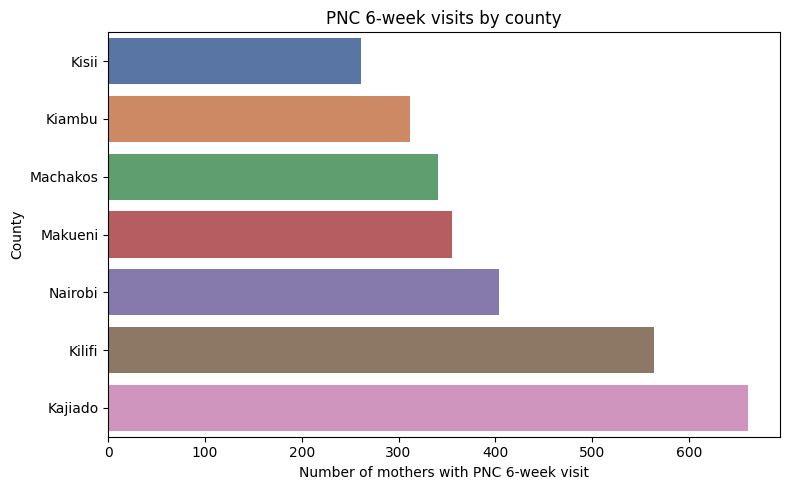

In [12]:
# iii. PNC 6-week coverage by parity

pnc_by_county = (
    mothers_hmis_df[mothers_hmis_df["postnatal_visit_6w"] == 1]
    .groupby("county")["postnatal_visit_6w"]
    .count()
    .reset_index(name="pnc_6w_count")
)
print(pnc_by_county)

# Plot
pnc_by_county = pnc_by_county.sort_values("pnc_6w_count", ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=pnc_by_county,
    x="pnc_6w_count",
    y="county",
    palette="deep",
    hue="county",
)

plt.xlabel("Number of mothers with PNC 6‑week visit")
plt.ylabel("County")
plt.title("PNC 6‑week visits by county")
plt.tight_layout()
plt.show()

###### Kajiado and Kilifi contribute the highest numbers of mothers returning for a PNC 6‑week visit, while counties like Kisii and Kiambu contribute far fewer, so the program should investigate what is working in Kajiado and Kilifi, for examplee, stronger counseling, better PROMPTS enrollment, or more engaged facilities, and intentionally replicate those practices in lower‑performing counties, setting county‑specific targets to increase the absolute number and coverage of PNC 6‑week visits where they are currently lowest.

   parity  pnc_6w_coverage
0       0        58.034321
1       1        58.392999
2       2        58.847737
3       3        56.382979
4       4        59.009901
5       5        54.310345


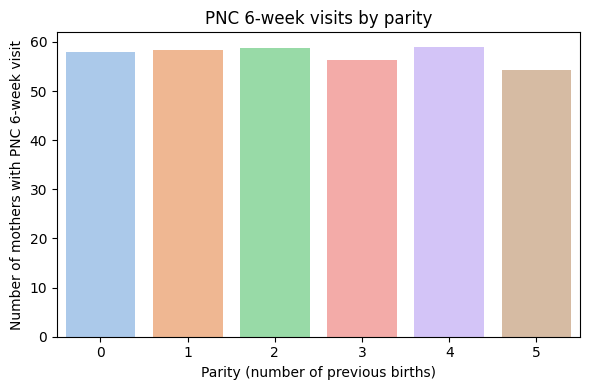

In [13]:
# iv. PNC 6‑week coverage by parity (percentage with visit)
pnc_by_parity = (
    mothers_hmis_df
    .groupby("parity")["postnatal_visit_6w"]
    .mean() * 100
).reset_index(name="pnc_6w_coverage")
print(pnc_by_parity)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=pnc_by_parity,
    x="parity",
    y="pnc_6w_coverage",
    palette="pastel",
    hue="parity",
    legend=False
)

plt.xlabel("Parity (number of previous births)")
plt.ylabel("Number of mothers with PNC 6‑week visit")
plt.title("PNC 6‑week visits by parity")
plt.tight_layout()
plt.show()

###### PNC 6‑week coverage is fairly similar across parity groups (around the high‑50% range), with only a slight drop for very high‑parity mothers (parity 5), so parity itself is not a major driver of low attendance; the program should therefore focus behaviour‑change and follow‑up efforts on other higher‑risk factors like age, residence, or PROMPTS engagement, while still monitoring high‑parity mothers but not designing parity‑specific interventions as a primary strategy.

delivery_mode
CS          59.016393
SVD         59.431940
assisted    62.307692
Name: postnatal_visit_6w, dtype: float64


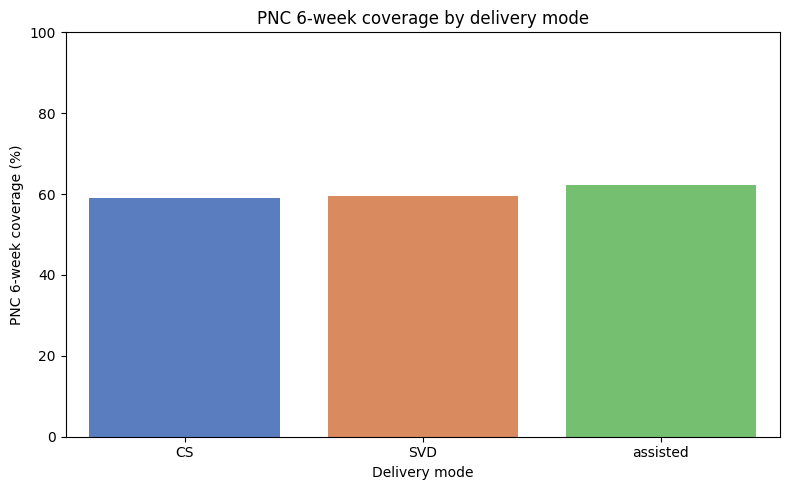

In [14]:
# v. PNC 6‑week coverage by delivery mode


select_merged_columns = merged_mothers_prompts_df[
    ["mother_id", "delivery_mode", "postnatal_visit_6w"]
]

pnc6w_rate_by_mode = (
    select_merged_columns
    .groupby("delivery_mode")["postnatal_visit_6w"]
    .mean() * 100
)

print(pnc6w_rate_by_mode)

pnc6w_rate_by_mode = pnc6w_rate_by_mode.reset_index()
pnc6w_rate_by_mode.columns = ["delivery_mode", "pnc6w_rate"]


plt.figure(figsize=(8, 5))
sns.barplot(
    data=pnc6w_rate_by_mode,
    x="delivery_mode",
    y="pnc6w_rate",
    palette="muted",
    hue="delivery_mode",
)

plt.ylabel("PNC 6-week coverage (%)")
plt.xlabel("Delivery mode")
plt.title("PNC 6-week coverage by delivery mode")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

###### PNC 6‑week coverage is very similar across delivery modes (around 59–62%), so mode of delivery is not a major driver of whether women return for the 6‑week visit. The actionable implication is that the organization should not design follow‑up strategies only around CS vs SVD vs assisted delivery; instead, focus on cross‑cutting barriers (transport, awareness of the 6‑week visit, reminders, partner or family support), and then use mode of delivery mainly to prioritize content (e.g., wound‑care and complication messages for CS and assisted births) rather than to predict attendance.

   prompts_enrolled  pnc_6w_coverage
0                 0        56.307435
1                 1        59.478127


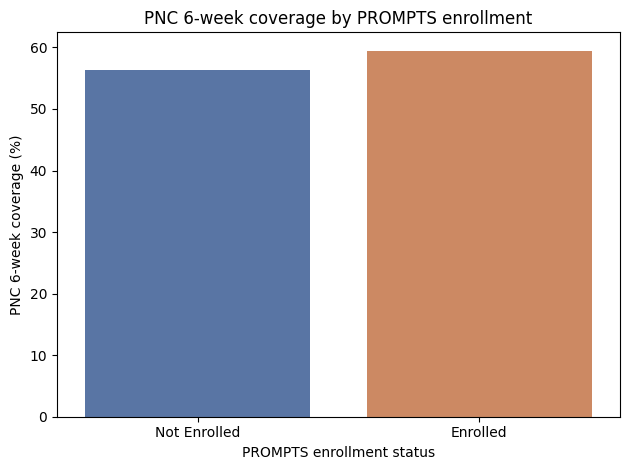

In [15]:
# vi. PNC 6-week coverage by PROMPTS enrollment status

# Calculate coverage (percentage)
pnc_by_enrollment = (
    mothers_hmis_df
    .groupby("prompts_enrolled")["postnatal_visit_6w"]
    .mean() * 100
).reset_index(name="pnc_6w_coverage")

print(pnc_by_enrollment)

# Map 0/1 to labels
pnc_by_enrollment["enrollment_status"] = pnc_by_enrollment["prompts_enrolled"].map(
    {0: "Not Enrolled", 1: "Enrolled"}
)

# Bar chart
sns.barplot(
    data=pnc_by_enrollment,
    x="enrollment_status",
    y="pnc_6w_coverage",
    palette="deep",
    hue="enrollment_status"
)
plt.xlabel("PROMPTS enrollment status")
plt.ylabel("PNC 6-week coverage (%)")
plt.title("PNC 6-week coverage by PROMPTS enrollment")
plt.tight_layout()
plt.show()

###### Mothers enrolled in PROMPTS have higher PNC 6‑week coverage (about 59%) than those not enrolled (about 56%), suggesting that PROMPTS is associated with better follow‑up; the program should therefore prioritize increasing PROMPTS enrollment at discharge (especially in facilities and groups with lower coverage) and strengthening engagement flows, with a clear target to close the gap and push overall PNC 6‑week coverage upward by expanding and deepening PROMPTS usage.

In [16]:
mothers_hmis_df.head()

,mother_id,facility_id,county,residence_type,age,age_group,parity,delivery_date,delivery_mode,complication_delivery,postpartum_complication_6w,postnatal_visit_date_1,postnatal_visit_6w,prompts_enrolled,prompts_mother_id
0,1,F028,Kilifi,rural,36,35-49,4,2024-10-17,CS,none,0,2024-11-18,1,0,NaN
1,2,F007,Kiambu,peri_urban,34,25-34,4,2024-07-23,SVD,other,0,2024-08-30,1,1,P00001
2,3,F002,Nairobi,urban,30,25-34,1,2024-03-21,SVD,sepsis,0,2024-04-25,1,0,NaN
3,4,F019,Kajiado,peri_urban,17,15-19,0,2024-03-23,SVD,none,0,NaN,0,1,P00002
4,5,F019,Kajiado,peri_urban,24,20-24,2,2024-11-06,SVD,none,0,2024-11-23,1,1,P00003
